### NAME: Devin McMurrey
### DATE: 11/20/2021
### Program: ASSIGNMENT 9

<font color='red' size=2>
    
### GRADE:
</font>

<font color = 'blue' size=2>
    
### GRADING COMMENTS: <font color='red'>()</font>
    
<font size = 2>

<ol>


    

</ol>
    
</font>
</font>


In [17]:
# Your first function should be defined in this cell. Each subsequent function will entered into a new cell. 

import json
import requests
import pandas as pd 

def get_employee_data():
    '''Load employee data from json formatted filename employees.json in pandas dataframe'''
    
    FILE_PATH = 'users/cis5357/assignments/'
    json_employee = open(FILE_PATH + 'Employees2.json', 'r') 
    
    df_employees = json.load(json_employee)
    
    df_employees = pd.DataFrame(df_employees) 
    
    return df_employees


In [18]:
def get_additional_data():
    '''Takes CSV and bulk reads data into data frame'''
    
    CSV_FILE_PATH = 'users/cis5357/assignments/'
    
    CSV_FILE = CSV_FILE_PATH + 'AdditionalData.csv'
    
    df_employees_additional = pd.read_csv(CSV_FILE)
    
    return df_employees_additional

In [19]:
def merge_data(df_employees_additional, df_employees):
    '''merges dataframes by invoking the two made in previous functions and combining them on column id'''
    
    df_employees_complete = df_employees.merge(df_employees_additional, on = 'id')
    
    return df_employees_complete
    

In [20]:
def clean_up_data(df_employees_complete): 
    '''modifies data frams and gets them ready for further analysis'''
    df_employees_complete.drop(['profile_image'],axis = 1, inplace = True) #i (inplace true updates the current data frame 
    
    df_employees_complete.rename(columns = {'employee_name':'name','employee_salary':'salary','employee_age':'age'}, inplace=True) #ii
    
    #df_employees_complete.info()
    
    df_employees_complete['salary'] = df_employees_complete['salary'].astype(float)#iii
    
    #df_employees_complete.info()
    
    display(df_employees_complete) #iv
    
    
    

In [21]:
def compute_bonus(df_employees_complete):
    '''Assigns bonus amount and calculates bonus for records based on salary in dataframe'''
    BONUS_PCT = 5.0
    df_employees_complete['bonus'] = (float(BONUS_PCT)/100)*df_employees_complete['salary']
   
    
    display(df_employees_complete)
    
  

In [22]:
def get_employees_below_100000(df_employees_complete):
    '''takes dataframe and builds new dataframe with employees making less than 100k'''
    df_employees_below_100000_unfiltered = df_employees_complete[df_employees_complete['salary']<100000]
    
    #new dataframe should only include name, salary, bonus and gender
    
    df_employees_below_100000 = df_employees_below_100000_unfiltered[['name','salary','bonus','gender']]
    
    display(df_employees_below_100000)
    
    return df_employees_below_100000

In [23]:
def get_marketing_employees(df_employees_complete):
    '''takes dataframe and builds new datframe with marketing employees '''
    df_marketing_employees_unfiltered = df_employees_complete.query("department == 'Marketing'")
    
    df_marketing_employees = df_marketing_employees_unfiltered[['name', 'salary', 'department', 'age']]
    
    display(df_marketing_employees)
    
    return df_marketing_employees

In [30]:
def get_mkting_and_older_employees(df_marketing_employees):
    '''Invoke get_marketing_employees function and return new dataframe with marketing employees over 40'''
    
    df_marketing_employees_over_40 = df_marketing_employees.query("age > 40")
    
    display(df_marketing_employees_over_40)
    
    
    

In [25]:
import matplotlib.pyplot as plt 

%matplotlib inline 

def perform_exploratory_analysis(df_employees_complete):
    '''uses data from data frame and creates pivot tables to show variaiton in 
    salary amonst gender and department'''
    
    df_pivot_salary_by_department_and_age = pd.pivot_table(df_employees_complete, index = 'department', columns = 'gender', values = 'salary', aggfunc = 'mean')
    display(df_pivot_salary_by_department_and_age)
    
    
    df_pivot_salary_by_department_and_age.plot(kind='bar');
   
    plt.show()
    
    

In [31]:
def main():
    '''invokes all other functions and drives logic of program '''
    df_employees = get_employee_data()
    
    df_employees_additional = get_additional_data()

    df_employees_complete = merge_data(df_employees_additional, df_employees)
    
    clean_up_data(df_employees_complete)
    
    compute_bonus(df_employees_complete)
    
    get_employees_below_100000(df_employees_complete)
    
    df_marketing_employees = get_marketing_employees(df_employees_complete)
    
    get_mkting_and_older_employees(df_marketing_employees)
    
    perform_exploratory_analysis(df_employees_complete)

,id,name,salary,age,senior_mgmt,department,gender
0,1,Tiger Nixon,320800.0,61,True,Marketing,Male
1,2,Garrett Winters,170750.0,63,True,Marketing,Male
2,3,Ashton Cox,86000.0,66,False,Finance,Male
3,4,Cedric Kelly,433060.0,22,True,Finance,Male
4,5,Airi Satou,162700.0,33,True,Client Services,Female
5,6,Brielle Williamson,372000.0,61,False,Legal,Female
6,7,Herrod Chandler,137500.0,59,True,Product,Male
7,8,Rhona Davidson,327900.0,55,True,Finance,Female
8,9,Colleen Hurst,205500.0,39,True,Engineering,Female
9,10,Sonya Frost,103600.0,23,True,Business Development,Female


,id,name,salary,age,senior_mgmt,department,gender,bonus
0,1,Tiger Nixon,320800.0,61,True,Marketing,Male,16040.0
1,2,Garrett Winters,170750.0,63,True,Marketing,Male,8537.5
2,3,Ashton Cox,86000.0,66,False,Finance,Male,4300.0
3,4,Cedric Kelly,433060.0,22,True,Finance,Male,21653.0
4,5,Airi Satou,162700.0,33,True,Client Services,Female,8135.0
5,6,Brielle Williamson,372000.0,61,False,Legal,Female,18600.0
6,7,Herrod Chandler,137500.0,59,True,Product,Male,6875.0
7,8,Rhona Davidson,327900.0,55,True,Finance,Female,16395.0
8,9,Colleen Hurst,205500.0,39,True,Engineering,Female,10275.0
9,10,Sonya Frost,103600.0,23,True,Business Development,Female,5180.0


,name,salary,bonus,gender
2,Ashton Cox,86000.0,4300.0,Male
10,Jena Gaines,90560.0,4528.0,Female
23,Doris Wilder,85600.0,4280.0,Female


,name,salary,department,age
0,Tiger Nixon,320800.0,Marketing,61
1,Garrett Winters,170750.0,Marketing,63
21,Yuri Berry,675000.0,Marketing,40


,name,salary,department,age
0,Tiger Nixon,320800.0,Marketing,61
1,Garrett Winters,170750.0,Marketing,63


gender,Female,Male
department,,
Business Development,103600.0,NaN
Client Services,124150.0,119225.0
Engineering,205500.0,NaN
Finance,356825.0,259530.0
Human Resources,280580.0,725000.0
Legal,358500.0,342000.0
Marketing,NaN,388850.0
Product,227500.0,168000.0
Sales,313500.0,NaN


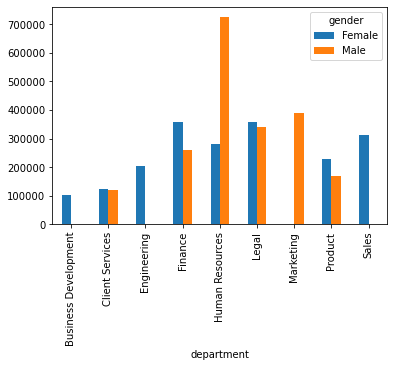

In [32]:
main()

The bar graph generated from the pivot tables indicates that pay between genders is relatively equal, with women generally making slightly more than their male counterparts. The largest descrepency, so I will consider an outlier, is in Human Resources where the male worker makes signficantly more than the average female working in the departnment. 

However, given the small sample size, and the fact that some of these departments only have 1-2 employees in each I would suggest a different approach to the analysis usuing a pivot table with different variables. Perhaps "senior managment" instead of "department" as the index would yield better results to determine to pay descrimination. 